In [178]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bharatkumar0925/sherlock-holmes-collection")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sherlock-holmes-collection


In [179]:
!pip install cleantext

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import cleantext
from collections import Counter
import re
import spacy
from heapq import nlargest
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import T5Tokenizer, T5ForConditionalGeneration
from transformers import AutoTokenizer, AutoModelForCausalLM
sns.set()

In [181]:
os.listdir('/kaggle/input/sherlock-holmes-collection/collection of sherlock holmes')

['holmes.csv', 'sherlock']

In [182]:
df = pd.read_csv('/kaggle/input/sherlock-holmes-collection/collection of sherlock holmes/holmes.csv')
df.head()

,title,author,content
0,THE ADVENTURE OF THE THREE GABLES\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE GABLES\n\n ...
1,THE ADVENTURE OF THE THREE GARRIDEBS\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE GARRIDEBS\n\n ...
2,THE ADVENTURE OF THE THREE STUDENTS\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE STUDENTS\n\n ...
3,THE ADVENTURE OF THE ABBEY GRANGE\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE ABBEY GRANGE\n\n ...
4,THE ADVENTURES OF SHERLOCK HOLMES\n\n ...,Arthur Conan Doyle,THE ADVENTURES OF SHERLOCK HOLMES\n\n ...


In [183]:
df.shape

(67, 3)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    67 non-null     object
 1   author   67 non-null     object
 2   content  67 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


In [185]:
df.isnull().sum()

title      0
author     0
content    0
dtype: int64

In [186]:
df.duplicated().sum()

0

In [187]:
df['content'][0]

'THE ADVENTURE OF THE THREE GABLES\n\n                               Arthur Conan Doyle\n\n\n\n     I don\'t think that any of my adventures with Mr. Sherlock Holmes\n     opened quite so abruptly, or so dramatically, as that which I\n     associate with The Three Gables. I had not seen Holmes for some days\n     and had no idea of the new channel into which his activities had been\n     directed. He was in a chatty mood that morning, however, and had just\n     settled me into the well-worn low armchair on one side of the fire,\n     while he had curled down with his pipe in his mouth upon the opposite\n     chair, when our visitor arrived. If I had said that a mad bull had\n     arrived it would give a clearer impression of what occurred.\n\n     The door had flown open and a huge negro had burst into the room. He\n     would have been a comic figure if he had not been terrific, for he\n     was dressed in a very loud gray check suit with a flowing\n     salmon-coloured tie. His broa

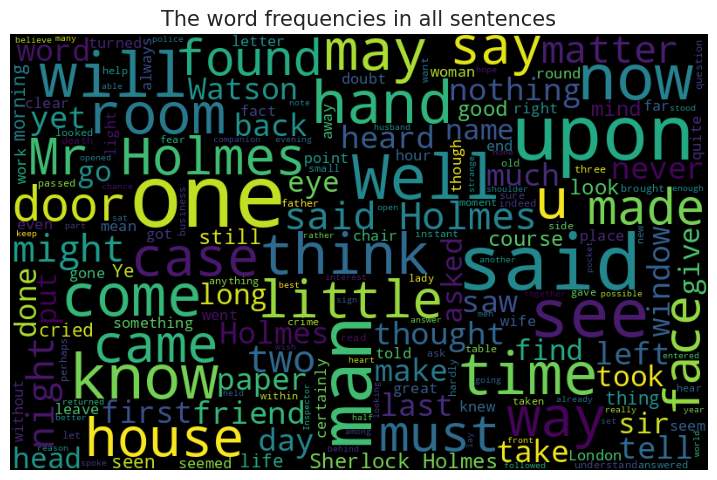

In [188]:
plt.figure(figsize = (9, 7))
all_sents = ' '.join([sentence for sentence in df['content']])
word_cloud = WordCloud(width = 800, height = 500, max_font_size = 100, random_state = 101).generate(all_sents)
plt.imshow(word_cloud)
plt.title('The word frequencies in all sentences', fontsize = 15)
plt.axis('off')
plt.show()

In [189]:
df['cleaned_content'] = df['content'].apply(lambda x: cleantext.clean_words(x, 
                                                                           clean_all = False,
                                                                           extra_spaces = True,
                                                                           stemming = False,
                                                                           stopwords = True,
                                                                           lowercase = True,
                                                                           numbers = True,
                                                                           punct = True,
                                                                           stp_lang = 'english'))

In [190]:
df.head()

,title,author,content,cleaned_content
0,THE ADVENTURE OF THE THREE GABLES\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE GABLES\n\n ...,"[adventure, three, gables, arthur, conan, doyl..."
1,THE ADVENTURE OF THE THREE GARRIDEBS\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE GARRIDEBS\n\n ...,"[adventure, three, garridebs, arthur, conan, d..."
2,THE ADVENTURE OF THE THREE STUDENTS\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE STUDENTS\n\n ...,"[adventure, three, students, arthur, conan, do..."
3,THE ADVENTURE OF THE ABBEY GRANGE\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE ABBEY GRANGE\n\n ...,"[adventure, abbey, grange, arthur, conan, doyl..."
4,THE ADVENTURES OF SHERLOCK HOLMES\n\n ...,Arthur Conan Doyle,THE ADVENTURES OF SHERLOCK HOLMES\n\n ...,"[adventures, sherlock, holmes, arthur, conan, ..."


In [191]:
def word_joining(words):
    return ' '.join(words)

In [192]:
df['cleaned_content'] = df['cleaned_content'].apply(word_joining)

In [193]:
df.head()

,title,author,content,cleaned_content
0,THE ADVENTURE OF THE THREE GABLES\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE GABLES\n\n ...,adventure three gables arthur conan doyle dont...
1,THE ADVENTURE OF THE THREE GARRIDEBS\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE GARRIDEBS\n\n ...,adventure three garridebs arthur conan doyle m...
2,THE ADVENTURE OF THE THREE STUDENTS\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE STUDENTS\n\n ...,adventure three students arthur conan doyle ye...
3,THE ADVENTURE OF THE ABBEY GRANGE\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE ABBEY GRANGE\n\n ...,adventure abbey grange arthur conan doyle bitt...
4,THE ADVENTURES OF SHERLOCK HOLMES\n\n ...,Arthur Conan Doyle,THE ADVENTURES OF SHERLOCK HOLMES\n\n ...,adventures sherlock holmes arthur conan doyle ...


In [194]:
df['cleaned_content'][0]

'adventure three gables arthur conan doyle dont think adventures mr sherlock holmes opened quite abruptly dramatically associate three gables seen holmes days idea new channel activities directed chatty mood morning however settled wellworn low armchair one side fire curled pipe mouth upon opposite chair visitor arrived said mad bull arrived would give clearer impression occurred door flown open huge negro burst room would comic figure terrific dressed loud gray check suit flowing salmoncoloured tie broad face flattened nose thrust forward sullen dark eyes smouldering gleam malice turned one us genlmen masser holmes asked holmes raised pipe languid smile oh said visitor coming unpleasant stealthy step round angle table see masser holmes keep hands folks business leave folks manage affairs got masser holmes keep talking said holmes fine oh fine growled savage wont damn fine trim bit ive handled kind didnt look fine look masser holmes swung huge knotted lump fist friends nose holmes exam

In [195]:
def modifying_content(text):
    text = text.lower()
    text = re.sub('\n', ' ', text)
    text = re.sub('\s', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [196]:
df['m_content'] = df['content'].apply(modifying_content)

In [197]:
df.head()

,title,author,content,cleaned_content,m_content
0,THE ADVENTURE OF THE THREE GABLES\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE GABLES\n\n ...,adventure three gables arthur conan doyle dont...,the adventure of the three gables arthur conan...
1,THE ADVENTURE OF THE THREE GARRIDEBS\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE GARRIDEBS\n\n ...,adventure three garridebs arthur conan doyle m...,the adventure of the three garridebs arthur co...
2,THE ADVENTURE OF THE THREE STUDENTS\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE THREE STUDENTS\n\n ...,adventure three students arthur conan doyle ye...,the adventure of the three students arthur con...
3,THE ADVENTURE OF THE ABBEY GRANGE\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE ABBEY GRANGE\n\n ...,adventure abbey grange arthur conan doyle bitt...,the adventure of the abbey grange arthur conan...
4,THE ADVENTURES OF SHERLOCK HOLMES\n\n ...,Arthur Conan Doyle,THE ADVENTURES OF SHERLOCK HOLMES\n\n ...,adventures sherlock holmes arthur conan doyle ...,the adventures of sherlock holmes arthur conan...


In [198]:
df['m_content'][0]

'the adventure of the three gables arthur conan doyle i don\'t think that any of my adventures with mr. sherlock holmes opened quite so abruptly, or so dramatically, as that which i associate with the three gables. i had not seen holmes for some days and had no idea of the new channel into which his activities had been directed. he was in a chatty mood that morning, however, and had just settled me into the well-worn low armchair on one side of the fire, while he had curled down with his pipe in his mouth upon the opposite chair, when our visitor arrived. if i had said that a mad bull had arrived it would give a clearer impression of what occurred. the door had flown open and a huge negro had burst into the room. he would have been a comic figure if he had not been terrific, for he was dressed in a very loud gray check suit with a flowing salmon-coloured tie. his broad face and flattened nose were thrust forward, as his sullen dark eyes, with a smouldering gleam of malice in them, turn

In [199]:
def word_scoring(text):
    words = cleantext.clean_words(text,
                                 clean_all = False,
                                 extra_spaces = True,
                                 stemming = False,
                                 stopwords = True,
                                 lowercase = True,
                                 numbers = True,
                                 punct = True,
                                 stp_lang = 'english')
    word_scores = Counter(words)
    for word, scores in word_scores.items():
        word_scores[word] = word_scores[word] / max(word_scores.values())
    return word_scores

In [200]:
def sentence_scoring(text):
    word_scores = word_scoring(text)
    nlp = spacy.load('en_core_web_sm')
    sentence_scores = dict()
    doc = nlp(text)
    sentences = [sentence.text for sentence in doc.sents]
    for sentence in sentences:
        for word in sentence.split():
            if word in word_scores.keys():
                if sentence not in sentence_scores.keys():
                    sentence_scores[sentence] = word_scores[word]
                else:
                    sentence_scores[sentence] += word_scores[word]
    return sentence_scores, sentences

In [201]:
def ex_summarization(text, num_sentences):
    sentence_scores, sentences = sentence_scoring(text)
    n = nlargest(num_sentences, sentence_scores, key = sentence_scores.get)
    summ_sent = []
    for i in sentences:
        for j in n:
            if i == j:
                summ_sent.append(i)
    return ' '.join(summ_sent)

In [205]:
df1 = df.sample(5)

In [206]:
df1

,title,author,content,cleaned_content,m_content
58,THE STOCK,Arthur Conan Doyle,THE STOCK-BROKER'S CLERK\n\n ...,stockbrokers clerk arthur conan doyle shortly ...,the stock-broker's clerk arthur conan doyle sh...
63,THE VALLEY OF FEAR\n\n ...,Arthur Conan Doyle,THE VALLEY OF FEAR\n\n ...,valley fear arthur conan doyle table contents ...,the valley of fear arthur conan doyle table of...
38,THE ADVENTURE OF THE\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE\n ...,adventure missing threequarter arthur conan do...,the adventure of the missing three-quarter art...
20,THE ADVENTURE OF THE DEVIL,Arthur Conan Doyle,THE ADVENTURE OF THE DEVIL'S FOOT\n\n ...,adventure devils foot arthur conan doyle recor...,the adventure of the devil's foot arthur conan...
64,THE ADVENTURE OF THE VEILED LODGER\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE VEILED LODGER\n\n ...,adventure veiled lodger arthur conan doyle one...,the adventure of the veiled lodger arthur cona...


In [207]:
df1['ex_summarization'] = df1['m_content'].apply(lambda x: ex_summarization(x, 10))

In [208]:
df1

,title,author,content,cleaned_content,m_content,ex_summarization
58,THE STOCK,Arthur Conan Doyle,THE STOCK-BROKER'S CLERK\n\n ...,stockbrokers clerk arthur conan doyle shortly ...,the stock-broker's clerk arthur conan doyle sh...,"""if you want good men you should pay them a go..."
63,THE VALLEY OF FEAR\n\n ...,Arthur Conan Doyle,THE VALLEY OF FEAR\n\n ...,valley fear arthur conan doyle table contents ...,the valley of fear arthur conan doyle table of...,in his bedroom at his new abode mcmurdo felt i...
38,THE ADVENTURE OF THE\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE\n ...,adventure missing threequarter arthur conan do...,the adventure of the missing three-quarter art...,a second very obvious one is that this young m...
20,THE ADVENTURE OF THE DEVIL,Arthur Conan Doyle,THE ADVENTURE OF THE DEVIL'S FOOT\n\n ...,adventure devils foot arthur conan doyle recor...,the adventure of the devil's foot arthur conan...,i may have commented upon my friend's power of...
64,THE ADVENTURE OF THE VEILED LODGER\n\n ...,Arthur Conan Doyle,THE ADVENTURE OF THE VEILED LODGER\n\n ...,adventure veiled lodger arthur conan doyle one...,the adventure of the veiled lodger arthur cona...,"so excited was he that he did not rise, but sa..."


In [209]:
df1.reset_index(drop = True, inplace = True)

In [210]:
df1['content'][0]

'THE STOCK-BROKER\'S CLERK\n\n                               Arthur Conan Doyle\n\n\n\n     Shortly after my marriage I had bought a connection in the Paddington\n     district. Old Mr. Farquhar, from whom I purchased it, had at one time\n     an excellent general practice; but his age, and an affliction of the\n     nature of St. Vitus\'s dance from which he suffered, had very much\n     thinned it. The public not unnaturally goes on the principle that he\n     who would heal others must himself be whole, and looks askance at the\n     curative powers of the man whose own case is beyond the reach of his\n     drugs. Thus as my predecessor weakened his practice declined, until\n     when I purchased it from him it had sunk from twelve hundred to\n     little more than three hundred a year. I had confidence, however, in\n     my own youth and energy, and was convinced that in a very few years\n     the concern would be as flourishing as ever.\n\n     For three months after taking over t

In [211]:
df1['ex_summarization'][0]

'"if you want good men you should pay them a good price," said i. "\'"he would rather have our small price than your big one," said he. i had thought of a great office with shining tables and rows of clerks, such as i was used to, and i dare say i stared rather straight at the two deal chairs and one little table, which, with a ledger and a waste paper basket, made up the whole furniture. on the one hand, i was definitely engaged and had a hundred pounds in my pocket; on the other, the look of the offices, the absence of name on the wall, and other of the points which would strike a business man had left a bad impression as to the position of my employers. at the single table sat the man whom we had seen in the street, with his evening paper spread out in front of him, and as he looked up at us it seemed to me that i had never looked upon a face which bore such marks of grief, and of something beyond grief--of a horror such as comes to few men in a lifetime. that point is the request m

In [212]:
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

In [214]:
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [222]:
def ab_summarization(text):
    tokenized_text = tokenizer(text, max_length = 1024, truncation = True, return_tensors = 'pt')
    summ_model = model.generate(tokenized_text['input_ids'], min_length = 300, max_length = 1000, length_penalty = 2.0, num_beams = 7,early_stopping = True)
    return tokenizer.decode(summ_model[0], skip_special_tokens = True)

In [223]:
ab_text = ab_summarization(df1['m_content'][0])

In [224]:
ab_text

'Sherlock holmes came to see Watson, who had been suffering from a cold. Watson was surprised to find that his slippers had been scorched by damp. Holmes said he would come and see Watson as far off as birmingham, if he wished it. Watson said he was afraid he would have to explain his illness to holmes. "i am afraid that i am going to have to give it away," said holmes, with a tinge of bitterness. "You are ready to explain it?" Watson said, "in an instant." i scribbled a note to my neighbor, rushed upstairs to explain the matter to my wife, and joined holmes upon the door-step. "Your neighbor is a doctor," he said, nodding at the brass plate, "and he bought a practice as i did an old-established one?" "just the same as mine," i replied, "just as have been built since the same houses have ever been built" "Yes, i did," he replied. "your slippers are new," i said. "you could not have had them more than a few weeks. the soles which you are at this moment presenting to me are slightly scor

In [226]:
t5_tokenizer = T5Tokenizer.from_pretrained('google-t5/t5-small')

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [231]:
t5_model = T5ForConditionalGeneration.from_pretrained('google-t5/t5-small')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [234]:
def abt5_summarization(text):
    tokenized_text = t5_tokenizer.encode(text, max_length = 1024,return_tensors = 'pt')
    summ_model = t5_model.generate(tokenized_text, min_length = 300, max_length = 1000, length_penalty = 2.0, num_beams = 7, early_stopping = True)
    return t5_tokenizer.decode(summ_model[0], skip_special_tokens = True)

In [235]:
ab_t5_text = abt5_summarization(df1['m_content'][0])

In [236]:
ab_t5_text

'sherlock holmes: "i am afraid that i rather give myself away when i explain" sherlock holmes: "you have been unwell lately. summer colds are always a little trying" holmes: "i am afraid that i rather give myself away when i explain" "i am afraid that i rather give myself away when i explain," holmes says. "i am afraid that i rather give myself away when i explain," holmes says.»»»»»»»»»»»»»»»»»»»»»". \'how on earth o.c. and "we\'d......... and... \'how on earth...... and...... and. a. a. a. a. a. a. a. a. a. a. a. a. a. a s \'how, i i. \'how, i.»» \'how, i.»»»»»»»»»»»»»»»»»»»»»»»»»»»»»»»»»»»»»'

In [237]:
ab_t5_text2 = abt5_summarization(df1['m_content'][1])

In [238]:
ab_t5_text2

'sherlock holmes: "i am one of the most long-suffering of mortals" sherlock holmes: "i can hardly doubt that it is porlock\'s writing" holmes: "i can hardly doubt that it is porlock\'s writing, though i have seen it only twice before" holmes: "you are developing a certain unexpected vein of pawky humour, watson" holmes: "i can hardly doubt that it\'............... a... a sa. a long-sa. a long-saining of a long-suffering of a \'the s a savagely, i... the... and if i\'s... the sad a \'no a. e... e... and... and... and... and... and... the. a touch, a. a. a. a. a. a. a. a. a. a \'d\' a. he is a. a \'d\' and. he\'s.'

In [247]:
tokenizer3 = AutoTokenizer.from_pretrained('gavin124/gpt2-finetuned-cnn-summarization-v1')

In [248]:
model3 = AutoModelForCausalLM.from_pretrained('gavin124/gpt2-finetuned-cnn-summarization-v1')

pytorch_model.bin:   0%|          | 0.00/510M [00:00<?, ?B/s]

In [259]:
def ab_summarization3(text):
    tokenized_text = tokenizer3(text, max_length = 400, truncation = True, return_tensors = 'pt')
    summ_model = model3.generate(tokenized_text['input_ids'], min_length = 100, max_length = 500, length_penalty = 2.0, num_beams = 5, early_stopping = True)
    return tokenizer3.decode(summ_model[0], skip_special_tokens = True)

In [260]:
ab_summarization3(df1['m_content'][0])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'the stock-broker\'s clerk arthur conan doyle shortly after my marriage i had bought a connection in the paddington district. old mr. farquhar, from whom i purchased it, had at one time an excellent general practice; but his age, and an affliction of the nature of st. vitus\'s dance from which he suffered, had very much thinned it. the public not unnaturally goes on the principle that he who would heal others must himself be whole, and looks askance at the curative powers of the man whose own case is beyond the reach of his drugs. thus as my predecessor weakened his practice declined, until when i purchased it from him it had sunk from twelve hundred to little more than three hundred a year. i had confidence, however, in my own youth and energy, and was convinced that in a very few years the concern would be as flourishing as ever. for three months after taking over the practice i was kept very closely at work, and saw little of my friend sherlock holmes, for i was too busy to visit ba